In [3]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot

In [52]:
#Loading raw data from csv file
df = read_csv('sales-of-shampoo-over-a-three-ye.csv')

In [53]:
df.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [54]:
#Dropping the footer
df = df.drop(df.index[-1])

In [55]:
df.head()

,Month,Sales of shampoo over a three year period
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [56]:
#Saving the refined csv file
df.to_csv("shampoo-sales.csv")

In [57]:
#Defining parser
def parser(x) :
    return datetime.strptime('190' + x, "%Y-%m")

In [58]:
#Checking the parser
parser("3-10")

datetime.datetime(1903, 10, 1, 0, 0)

In [59]:
#Loading the data through parser
series = read_csv('shampoo-sales.csv', header=0, parse_dates=[1], index_col=1, squeeze=True, date_parser=parser)

In [60]:
series.head()

,Unnamed: 0,Sales of shampoo over a three year period
Month,,
1901-01-01,0,266.0
1901-02-01,1,145.9
1901-03-01,2,183.1
1901-04-01,3,119.3
1901-05-01,4,180.3


In [61]:
type(series)

pandas.core.frame.DataFrame

In [62]:
series.keys()

Index([u'Unnamed: 0', u'Sales of shampoo over a three year period'], dtype='object')

In [63]:
#Keeping just the required column
series = series['Sales of shampoo over a three year period']

In [64]:
series.head()

Month
1901-01-01    266.0
1901-02-01    145.9
1901-03-01    183.1
1901-04-01    119.3
1901-05-01    180.3
Name: Sales of shampoo over a three year period, dtype: float64

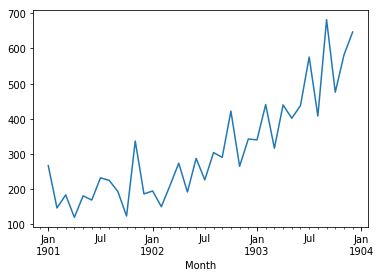

In [67]:
#Plotting the sales graph
series.plot()
pyplot.show()

In [68]:
#Splitting the data into training and testing
# First two years data will be used for training and the last one's will be used for testing
X = series.values
train, test = X[0:-12], X[-12:]

In [69]:
train

array([ 266. ,  145.9,  183.1,  119.3,  180.3,  168.5,  231.8,  224.5,
        192.8,  122.9,  336.5,  185.9,  194.3,  149.5,  210.1,  273.3,
        191.4,  287. ,  226. ,  303.6,  289.9,  421.6,  264.5,  342.3])

In [70]:
test

array([ 339.7,  440.4,  315.9,  439.3,  401.3,  437.4,  575.5,  407.6,
        682. ,  475.3,  581.3,  646.9])